In [1]:
import pvtools as pv
import numpy as np
import matplotlib.pyplot as plt
data_train = pv.readpvpfile('/home/jspringer/Workspace/output-check-vision-training/P1.pvp')
data_benign = pv.readpvpfile('/home/jspringer/Workspace/output-check-vision-benign/P1.pvp')
data_adversarial = pv.readpvpfile('/home/jspringer/Workspace/output-check-vision-adversarial/P1.pvp')
data_noisy = pv.readpvpfile('/home/jspringer/Workspace/output-check-vision-noisy/P1.pvp')
data_not = pv.readpvpfile('/home/jspringer/Workspace/output-check-vision-not/P1.pvp')

X_train = data_train['values'].toarray()
X_benign = data_benign['values'].toarray()
X_adversarial = data_adversarial['values'].toarray()
X_noisy = data_noisy['values'].toarray()
X_not = data_not['values'].toarray()

inputvision_lines_tra = open('/home/jspringer/Workspace/output-check-vision-training/timestamps/InputVision.txt').readlines()
Y_train = np.array([1 if 'Halle' in line else 0 for line in inputvision_lines_tra])

inputvision_lines_ben = open('/home/jspringer/Workspace/output-check-vision-benign/timestamps/InputVision.txt').readlines()
Y_benign = np.array([1 if 'benign/2/' in line else 0 for line in inputvision_lines_ben])

inputvision_lines_adv = open('/home/jspringer/Workspace/output-check-vision-adversarial/timestamps/InputVision.txt').readlines()
Y_adversarial = np.array([1 if 'adversarial/2/' in line else 0 for line in inputvision_lines_adv])

inputvision_lines_noi = open('/home/jspringer/Workspace/output-check-vision-noisy/timestamps/InputVision.txt').readlines()
Y_noisy = np.array([1 if 'noisy/2/' in line else 0 for line in inputvision_lines_noi])

inputvision_lines_not = open('/home/jspringer/Workspace/output-check-vision-not/timestamps/InputVision.txt').readlines()
Y_not = np.array([1 if 'Halle' in line else 0 for line in inputvision_lines_noi])

X_both = np.append(X_benign, X_not, axis=0)
Y_both = np.append(Y_benign, Y_not, axis=0)

X_both_adv = np.append(X_adversarial, X_not, axis=0)
Y_both_adv = np.append(Y_adversarial, Y_not, axis=0)

X_both_noi = np.append(X_noisy, X_not, axis=0)
Y_both_noi = np.append(Y_noisy, Y_not, axis=0)

Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done


In [30]:
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
import pandas as pd

def get_data(name):
    inputvision_lines = open('/home/jspringer/Workspace/LCAHalleBerry/' + name + '/timestamps/InputVision.txt').readlines()
    y = np.array([1 if '/2/' in line else 0 for line in inputvision_lines])
    
    data = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/' + name + '/P1.pvp')
    X = data['values'].toarray()
    return X, y
    
X_benign_downscale, Y_benign_downscale = get_data('output-benign-downscale')
X_adversarial_downscale, Y_adversarial_downscale = get_data('output-adversarial-downscale')
X_noisy_downscale, Y_noisy_downscale = get_data('output-noisy-downscale')
X_benign, Y_benign = get_data('output-benign')
X_adversarial, Y_adversarial = get_data('output-adversarial')
X_noisy, Y_noisy = get_data('output-noisy')

model = Perceptron(class_weight='balanced', max_iter=1000, tol=None)
model.fit(X_train[:, :], Y_train)

Y_pred_benign = model.predict(X_benign[:, :])
Y_pred_adversarial = model.predict(X_adversarial[:, :])
Y_pred_noisy = model.predict(X_noisy[:, :])
Y_pred_benign_downscale = model.predict(X_benign_downscale[:, :])
Y_pred_adversarial_downscale = model.predict(X_adversarial_downscale[:, :])
Y_pred_noisy_downscale = model.predict(X_noisy_downscale[:, :])

print(accuracy_score(Y_benign, Y_pred_benign))
print(accuracy_score(Y_adversarial, Y_pred_adversarial))
print(accuracy_score(Y_noisy, Y_pred_noisy))
print(accuracy_score(Y_benign_downscale, Y_pred_benign_downscale))
print(accuracy_score(Y_adversarial_downscale, Y_pred_adversarial_downscale))
print(accuracy_score(Y_noisy_downscale, Y_pred_noisy_downscale))

Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
0.86
0.86
0.86
0.86
0.8866666666666667
0.8866666666666667


In [175]:
thresh = 0.0446
Y_pred_train = (X_train[:, 326] > thresh).astype(int)
Y_pred_halle = np.extract(Y_train == 1, (X_train[:, 326] > thresh).astype(int))
Y_pred_not_halle = np.extract(Y_train == 0, (X_train[:, 326] > thresh).astype(int))
Y_halle = np.extract(Y_train == 1, Y_train)
Y_not_halle = np.extract(Y_train == 0, Y_train)
Y_pred_benign = (X_benign[:, 326] > thresh).astype(int)
print(accuracy_score(Y_halle, Y_pred_halle))
print(accuracy_score(Y_not_halle, Y_pred_not_halle))
print(accuracy_score(Y_train, Y_pred_train))
print(accuracy_score(Y_benign, Y_pred_benign))

0.8216216216216217
0.8216336358584924
0.8216328653146125
0.84


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1])

In [162]:
np.round(X_benign[:, 326] * 100) / 100

array([0.12, 0.16, 0.05, 0.  , 0.11, 0.42, 0.05, 0.21, 0.34, 0.32, 0.17,
       0.21, 0.04, 0.01, 0.19, 0.23, 0.12, 0.17, 0.21, 0.25, 0.  , 0.32,
       0.12, 0.  , 0.48, 0.11, 0.  , 0.26, 0.07, 0.03, 0.39, 0.32, 0.01,
       0.37, 0.2 , 0.  , 0.42, 0.05, 0.11, 0.25, 0.08, 0.05, 0.22, 0.16,
       0.26, 0.12, 0.01, 0.09, 0.07, 0.21, 0.15, 0.27, 0.27, 0.13, 0.36,
       0.21, 0.12, 0.12, 0.16, 0.3 , 0.02, 0.25, 0.41, 0.05, 0.17, 0.45,
       0.  , 0.29, 0.42, 0.24, 0.23, 0.53, 0.05, 0.25, 0.32],
      dtype=float32)

<IPython.core.display.Javascript object>


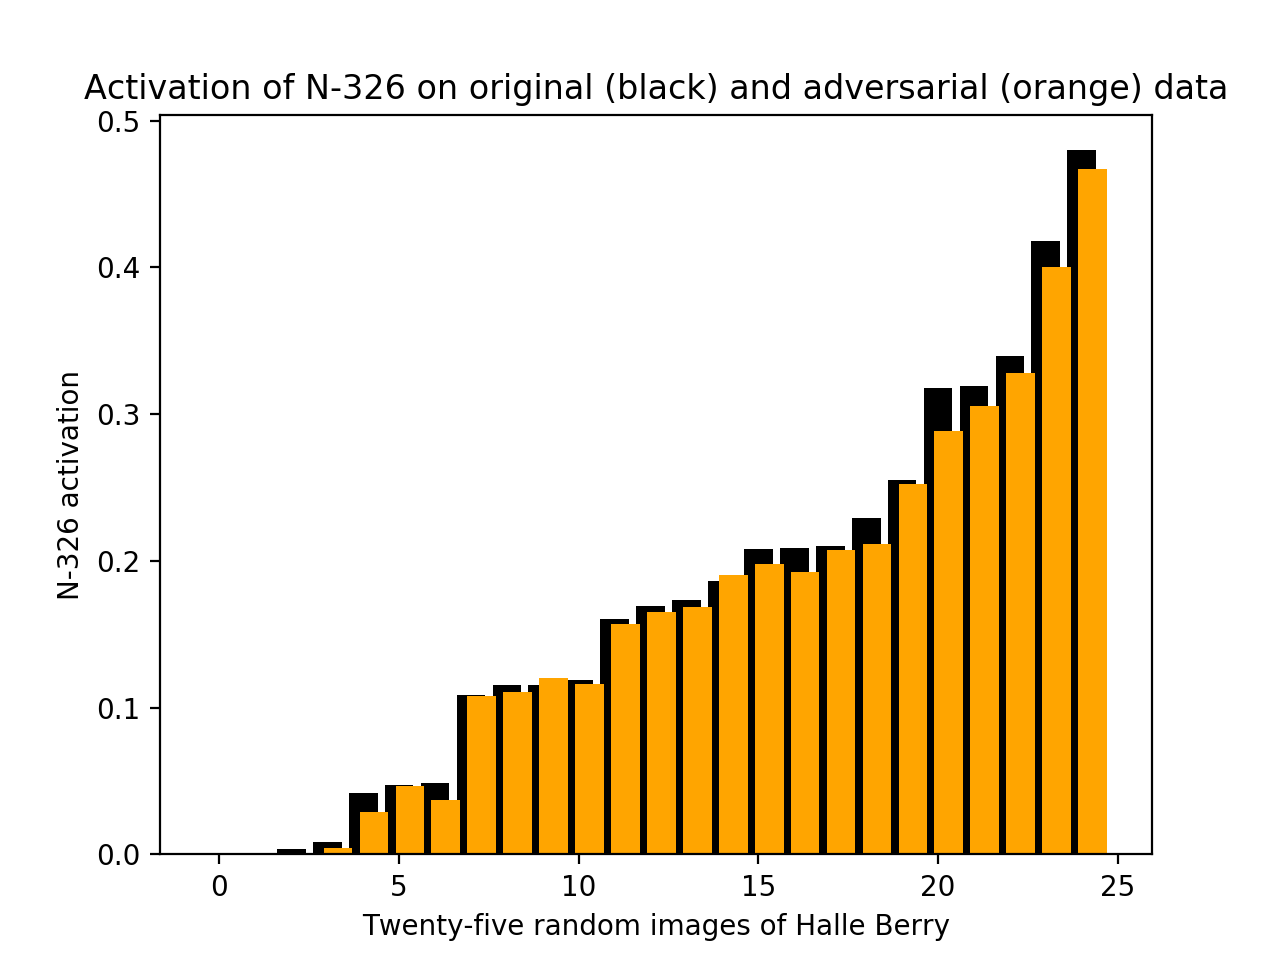

Text(0,0.5,'N-326 activation')

In [220]:
sorted_indices = np.argsort(X_benign[:25, 326])
X_benign_s = X_benign[:25, 326][sorted_indices]
X_adversarial_s = X_adversarial[:25, 326][sorted_indices]

plt.figure()
plt.bar(np.arange(len(X_benign_s)), X_benign_s, color='black', width=0.8)
plt.bar(np.arange(len(X_adversarial_s))+0.3, X_adversarial_s, color='orange', width=0.8)

plt.title('Activation of N-326 on original (black) and adversarial (orange) data')
plt.xlabel('Twenty-five random images of Halle Berry')
plt.ylabel('N-326 activation')

<IPython.core.display.Javascript object>


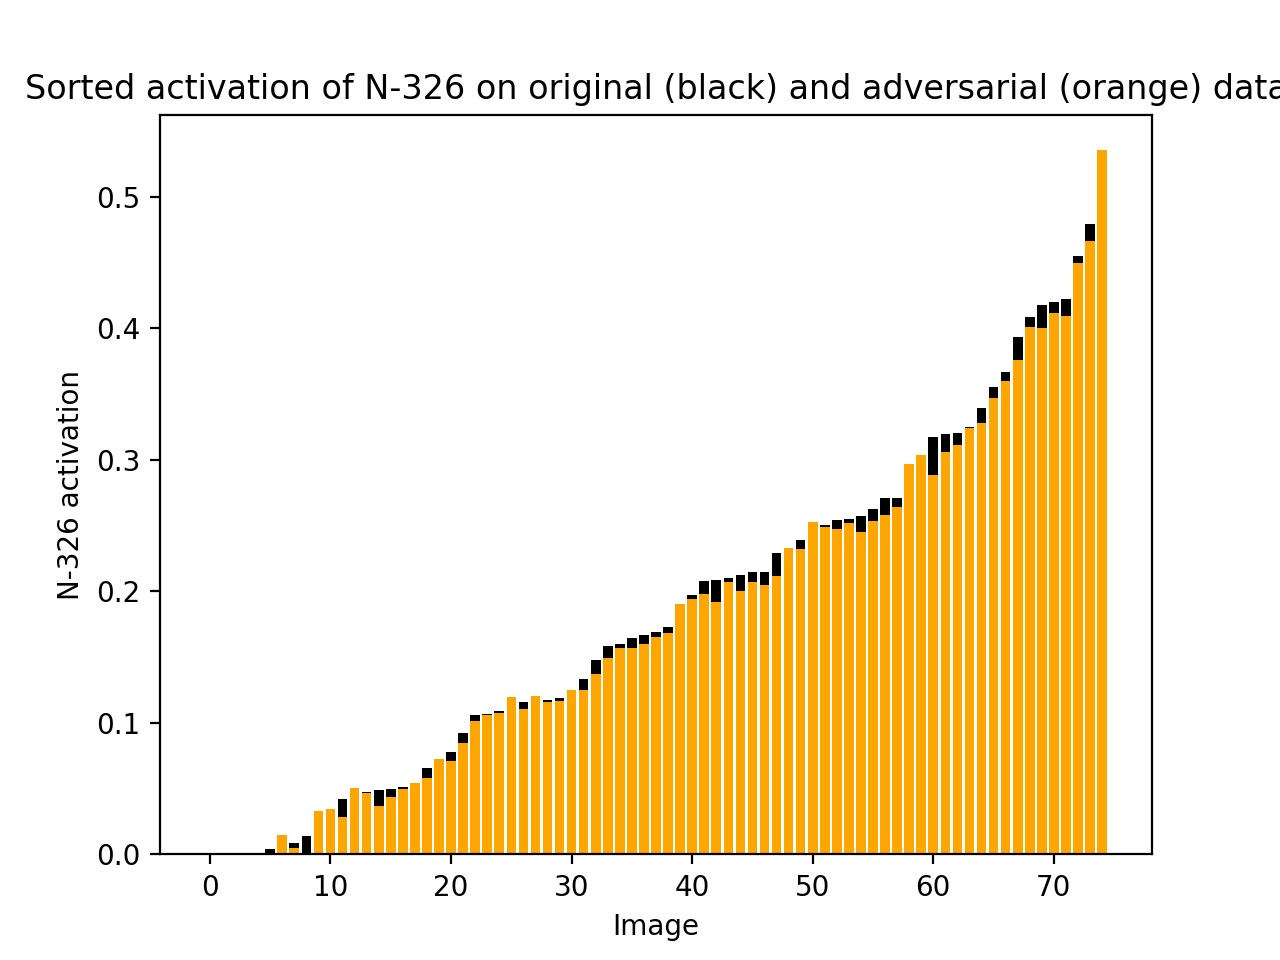

Text(0,0.5,'N-326 activation')

In [214]:
sorted_indices = np.argsort(X_benign[:, 326])
X_benign_s = X_benign[:, 326][sorted_indices]
X_adversarial_s = X_adversarial[:, 326][sorted_indices]

plt.figure()
plt.bar(np.arange(len(X_benign_s)), X_benign_s, color='black')
plt.bar(np.arange(len(X_adversarial_s)), X_adversarial_s, color='orange')

plt.title('Sorted activation of N-326 on original (black) and adversarial (orange) data')
plt.xlabel('Image')
plt.ylabel('N-326 activation')

<IPython.core.display.Javascript object>


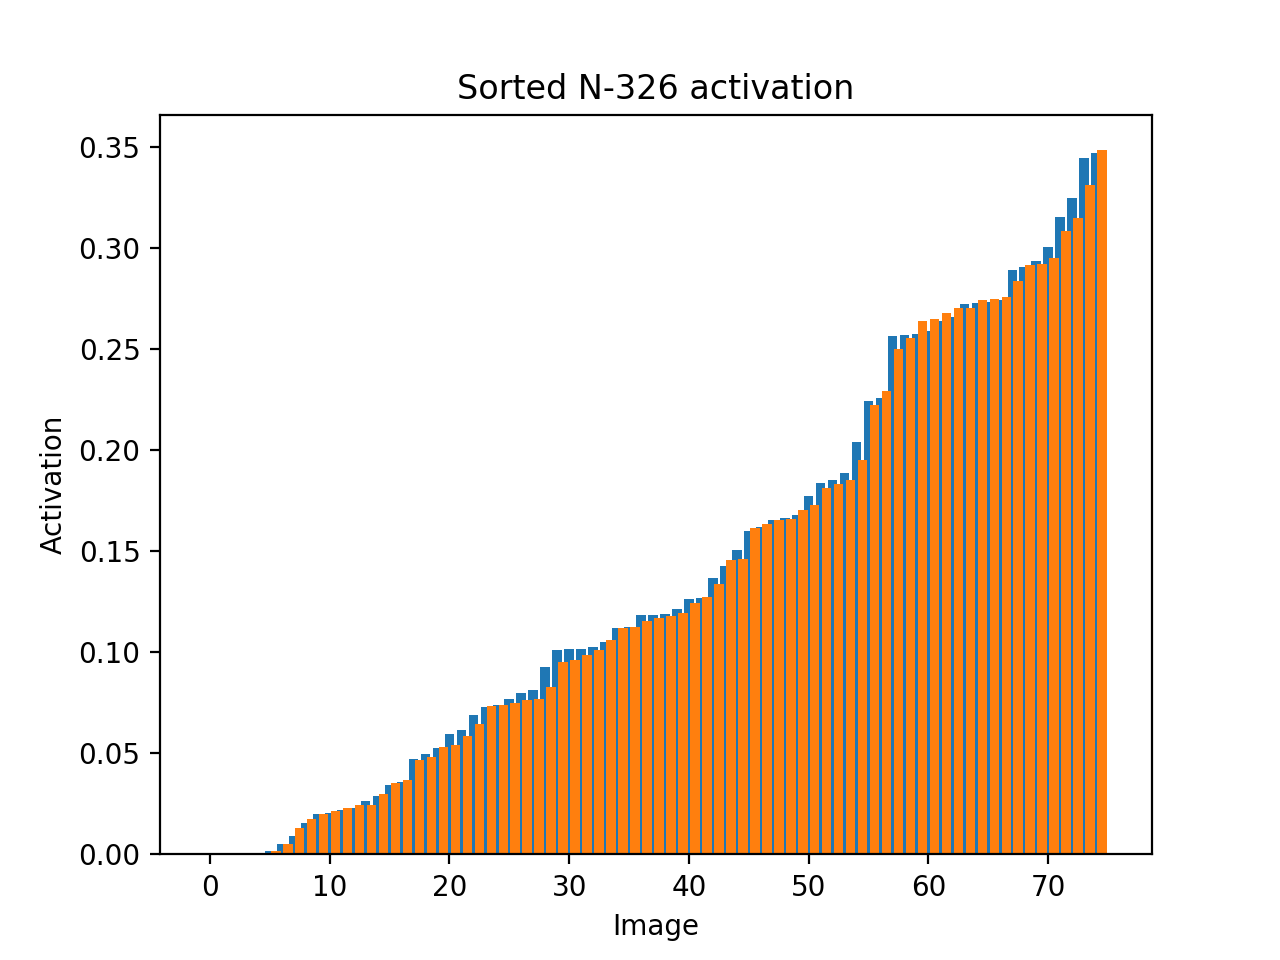

Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done


Text(0,0.5,'Activation')

In [34]:
%matplotlib notebook

def plot_data(name, class_y, offset=0):
    inputvision_lines = open('/home/jspringer/Workspace/LCAHalleBerry/' + name + '/timestamps/InputVision.txt').readlines()
    y = np.array([1 if '/2/' in line else 0 for line in inputvision_lines])
    
    data = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/' + name + '/P1.pvp')
    X = data['values'].toarray()
    plt.bar(np.arange(len(X[y == class_y]))+offset, sorted(X[y == class_y][:, 326]))

plt.figure()

plot_data('output-benign', 1)
plot_data('output-adversarial', 1, offset=0.5)

plt.title('Sorted N-326 activation')
plt.xlabel('Image')
plt.ylabel('Activation')

<IPython.core.display.Javascript object>


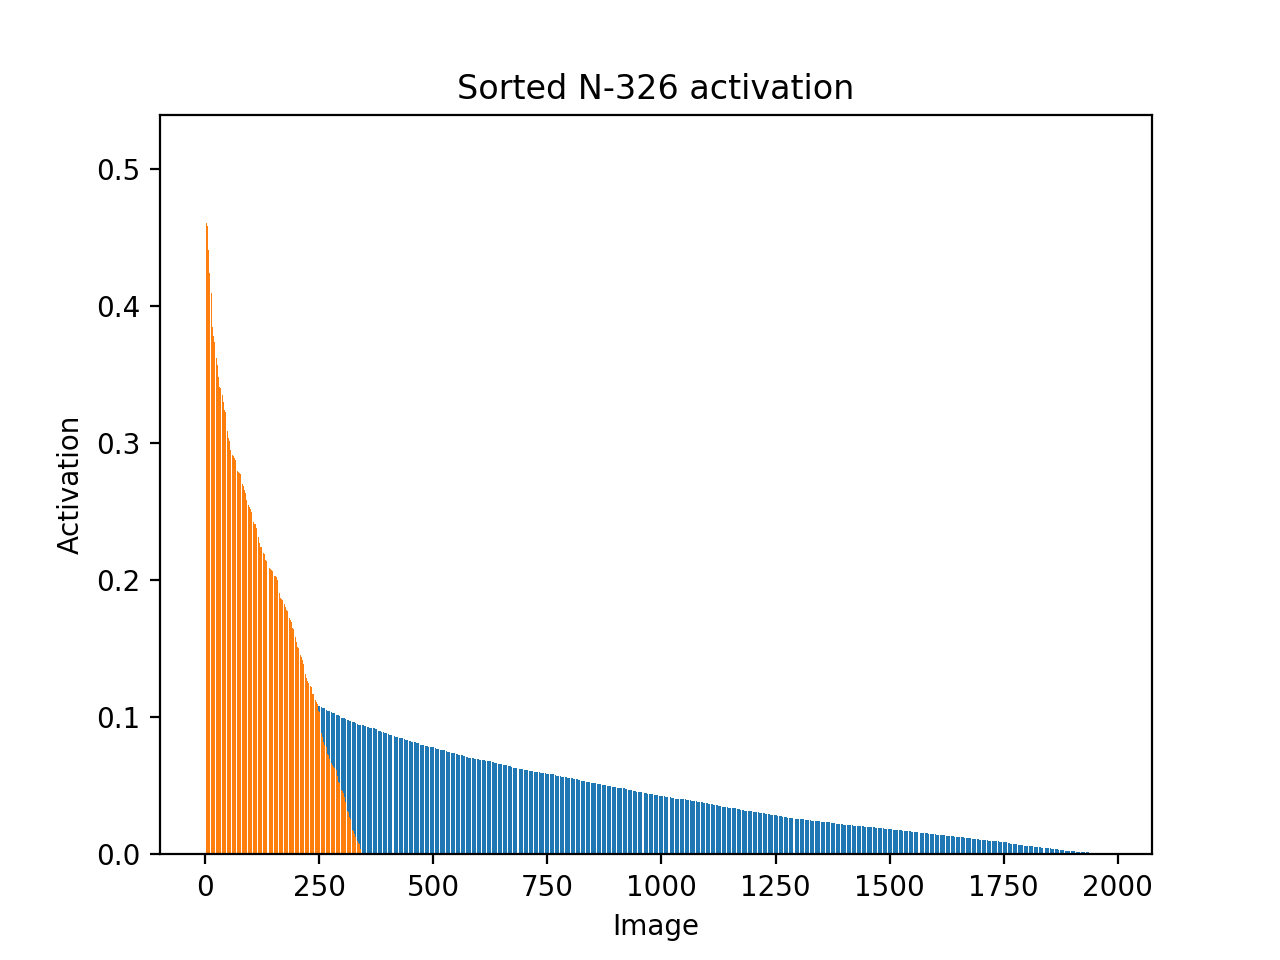

Text(0,0.5,'Activation')

In [113]:
plt.figure();

X_halle = np.extract(Y_train == 1, X_train[:, 326])
X_not_halle = np.extract(Y_train == 0, X_train[:, 326])
X_not_halle = np.extract(X_not_halle > 0, X_not_halle)
plt.bar(np.arange(len(X_not_halle)), list(reversed(sorted(X_not_halle))))
plt.bar(np.arange(len(X_halle)), list(reversed(sorted(X_halle))))
# plt.bar(np.arange(len(X_adversarial)), sorted(X_adversarial[:, 326]))
# plt.bar(np.arange(len(X_benign)+len(X_adversarial), len(X_benign)+len(X_adversarial)+len(X_noisy)), sorted(X_noisy[:, 326]))

plt.title('Sorted N-326 activation')
plt.xlabel('Image')
plt.ylabel('Activation')

0.7866666666666666

In [62]:
thresh = 0.04
t = len(np.extract(X_benign[:, 326] > thresh, X_benign[:, 326])) / len(X_benign)
f = 1 - len(np.extract(X_original[:, 326] > thresh, X_original[:, 326])) / len(X_benign)
(t + f) / 2

0.8533333333333333

In [221]:
with(open('/home/jspringer/Workspace/hb_classify/hb_activations.txt')) as f:
    lines = f.readlines()

<IPython.core.display.Javascript object>


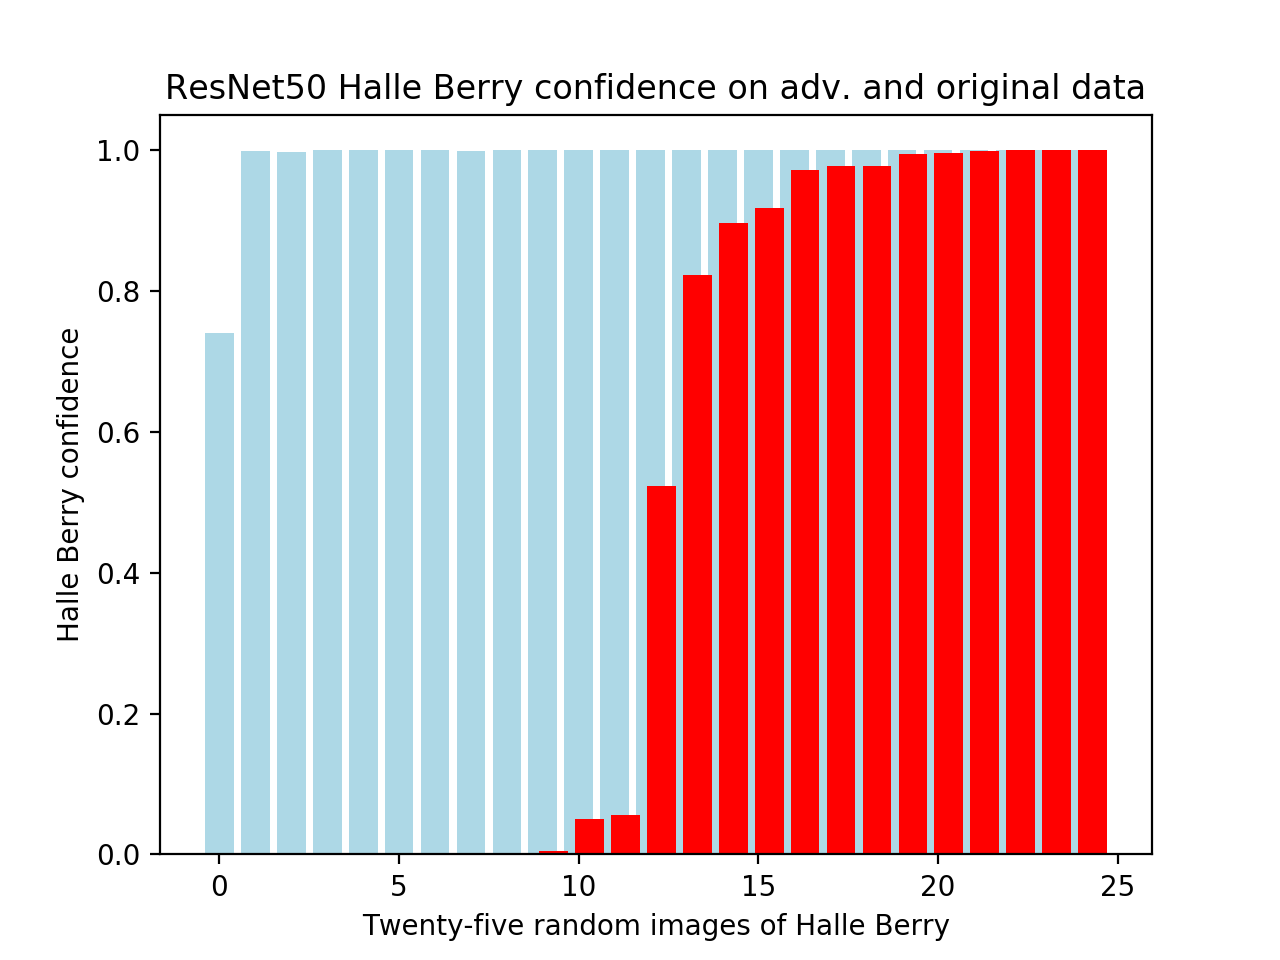

Text(0,0.5,'Halle Berry confidence')

In [250]:
res_benign = np.array([[float(elem) for elem in line.split(' ')] for line in lines[:75]])
res_adversarial = np.array([[float(elem) for elem in line.split(' ')] for line in lines[76:76+75]])

sorted_indices = np.argsort(res_adversarial[:25, 1])
res_benign_s = res_benign[:25, 1][sorted_indices]
res_adversarial_s = res_adversarial[:25, 1][sorted_indices]

plt.figure()
plt.bar(np.arange(len(res_benign_s)), res_benign_s, color='lightblue', width=0.8)
plt.bar(np.arange(len(res_adversarial_s))+0.3, res_adversarial_s, color='red', width=0.8)

plt.title('ResNet50 Halle Berry confidence on adv. and original data')
plt.xlabel('Twenty-five random images of Halle Berry')
plt.ylabel('Halle Berry confidence')
